In [1]:
import numpy as np
import matplotlib.pyplot as plt
from   datetime import datetime
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
from scipy import linalg as la
from netCDF4 import Dataset 
from datetime import datetime, timedelta
# import warnings
# warnings.filterwarnings('ignore')
# import os
# os.environ["PROJ_LIB"] = "C:\\Users\\USUARIO\\Anaconda3\\Library\\share"; #fixr
# import mpl_toolkits
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import interp1d

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from pybrain.datasets import SupervisedDataSet,UnsupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure import TanhLayer, SigmoidLayer, LinearLayer

import csv
import datetime as dt
import scipy.stats as ss

from scipy.interpolate import interp1d

In [2]:
data = pd.read_csv('input_net_region1.csv',delimiter=",").drop(['Unnamed: 0'], axis=1)

In [30]:
def escalamiento(serie):
    serie_sin_ciclo=((serie-np.mean(serie))/np.std(serie))
    serie_esc=serie_sin_ciclo/np.max(abs(serie_sin_ciclo))
    #probar esto
    serie_sin_ciclo_anual=serie_esc.rolling(12).mean()[12:]
#     serie_esc=serie-np.mean(serie)
    return serie_sin_ciclo_anual

In [31]:
data2=escalamiento(data)

In [33]:
# plt.figure(figsize=(12,6))
# plt.plot(data2.ssh,label="ssh")
# plt.plot(data2.ssh,label="t")
# plt.plot(data2.u,label="u")
# plt.plot(data2.v,label="v")
# plt.legend()
# # plt.figure()
# plt.plot(data2.ssh_obj,label="u")


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

0.0056270101279827485


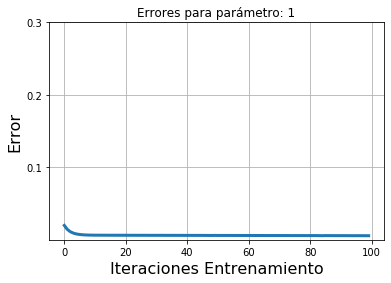

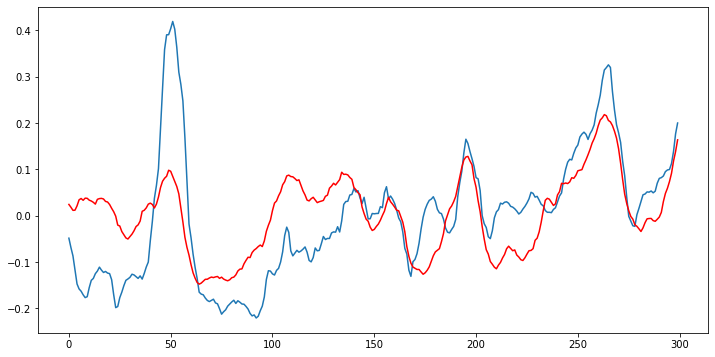

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

0.0029580023200215266


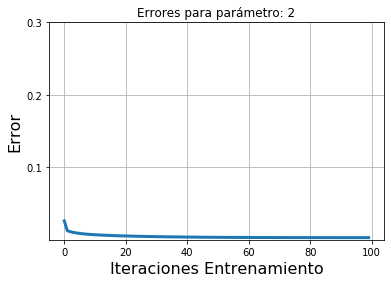

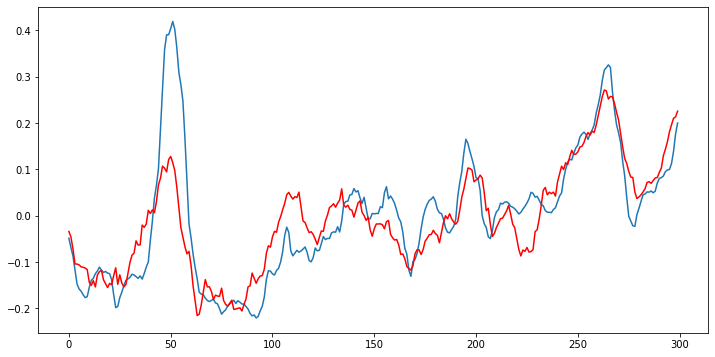

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

0.004219431013674233


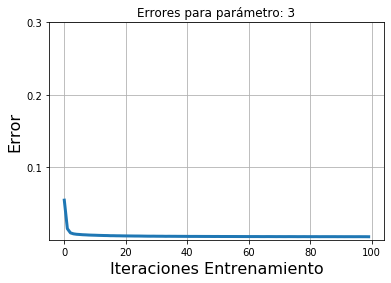

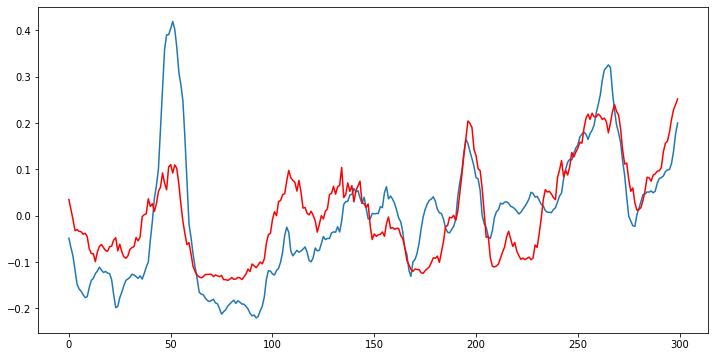

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

0.003003708958106579


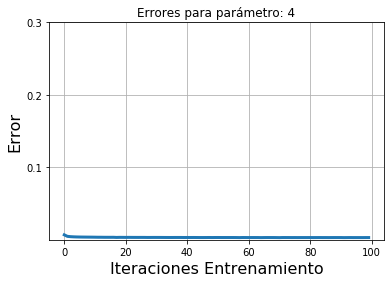

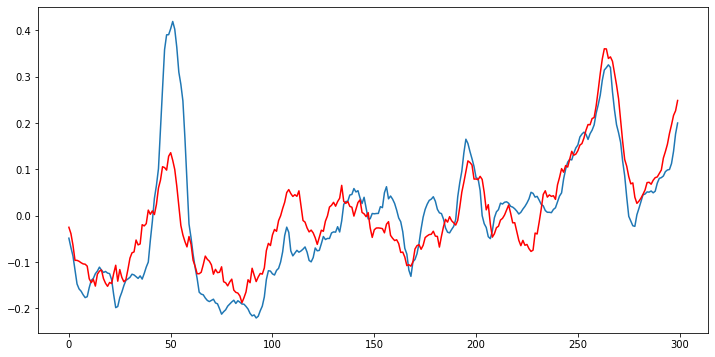

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

0.0033182931400619936


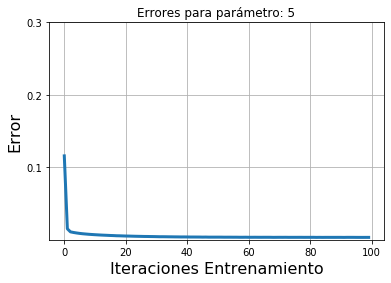

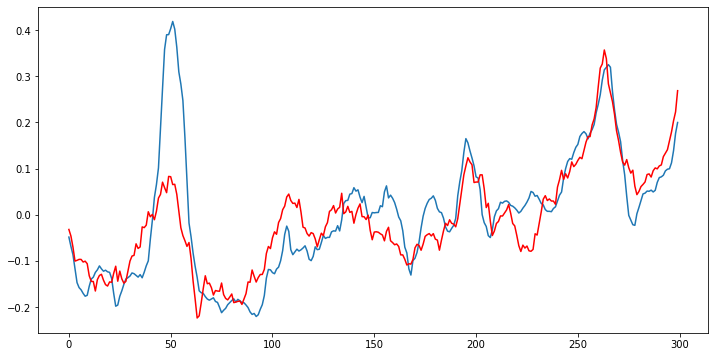

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

0.0043494224734930914


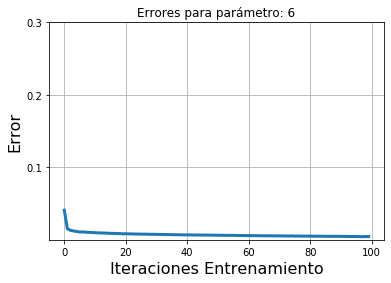

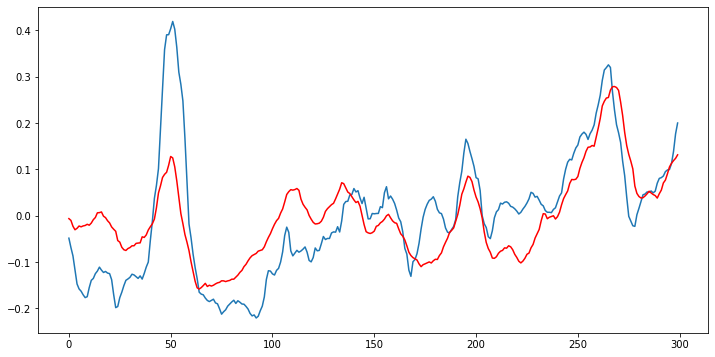

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

0.003001903600505645


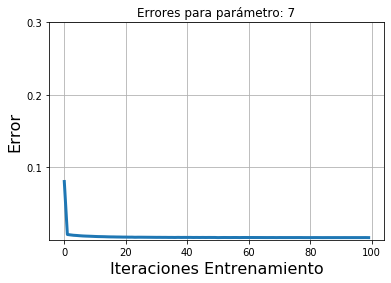

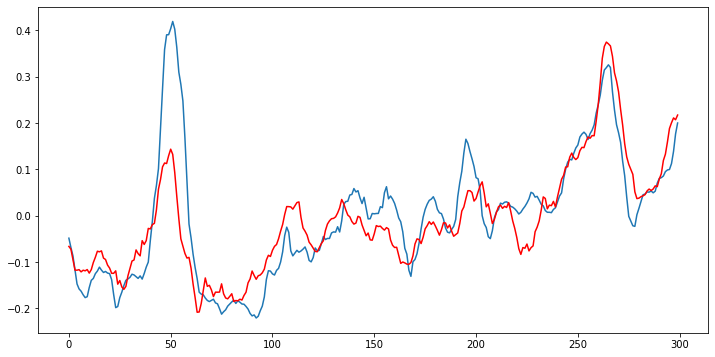

In [44]:
rango=np.arange(1,8,1)
for r in rango:
    data2=escalamiento(data)
    dsCalib=SupervisedDataSet(4,1) 
    for p1,p2,p3,p4,res in zip(data2.ssh,data2.t,data2.u,data2.v,data2.ssh_obj):
        dsCalib.addSample((p1,p2,p3,p4),(res,))
    #1 capa
    entradas, nodos_por_capa1,salidas = 4,r,1
    net = buildNetwork(entradas, nodos_por_capa1,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    
    #2 capas
#     entradas, nodos_por_capa1,nodos_por_capa2,salidas = 4,6,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    
    # 3 capas 
#     entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3,salidas = 4,11,11,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    
    # 4 capas 
#     entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3, nodos_por_capa4,salidas = 4,11,11,8,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3, nodos_por_capa4,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida

#     # 5 capas 
#     entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3, nodos_por_capa4,nodos_por_capa5,salidas = 4,11,11,8,8,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3, nodos_por_capa4,nodos_por_capa5,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida

      # 6 capas 
#     entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3, nodos_por_capa4,nodos_por_capa5,nodos_por_capa6,salidas = 4,11,11,8,8,2,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3, nodos_por_capa4,nodos_por_capa5,nodos_por_capa6,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida

    #Entrena la red
    net.reset()

    trainer = BackpropTrainer(net, dsCalib)
#     numero_de_conexiones = entradas*nodos_por_capa1 + nodos_por_capa1*salidas    
    iteraciones = 100
    errors = []
#     PesosEvol = np.zeros((iteraciones, numero_de_conexiones))
    activacion=[]
    for j in range(iteraciones):
        print (j,end=" ")
        #Entrena y mira como evoluciona el entrenamiento
        errors.append(trainer.train()) #tasa de aprendizaje por defecto 0.01
        activacion.append(net.activateOnDataset(dsCalib))
        Pesos=[]
        for i in net.modules:
            if i.name != 'bias':
                for c in net.connections[i]:
                    Pesos.append(c.params)        
        #Guarda la evolucion de los pesos de las entradas
#         Pesos = np.concatenate(np.array(Pesos)).reshape(numero_de_conexiones)
#         PesosEvol[j,:]=Pesos
    activacion=np.array(activacion)
    print("\n")
    print(min(errors))
    plt.figure()
    plt.title("Errores para parámetro: "+str(r))
    plt.plot(errors, lw = 3)
    plt.grid(True)
    plt.xlabel('Iteraciones Entrenamiento', size = 16)
    plt.ylabel('Error', size = 16)
    plt.yticks([0.1,0.2,0.3,0.4,0.5])
    plt.ylim(0,0.3)
    plt.show()
    plt.figure(figsize=(12,6))
#     plt.title('ENTRENAMIENTO')
    x=np.arange(0,len(activacion[99,:]),1)
    plt.plot(x,data2.ssh_obj)
    plt.plot(x,activacion[99,:], color='red')
    plt.show()

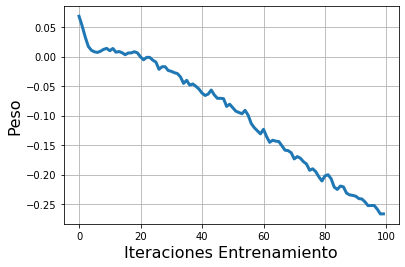

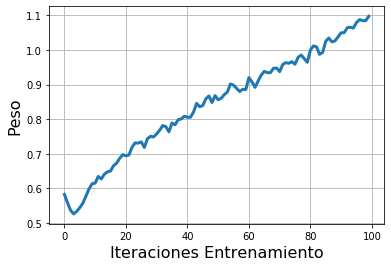

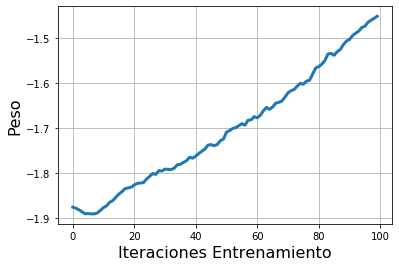

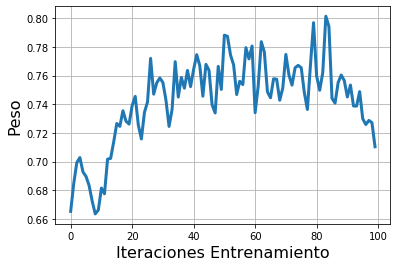

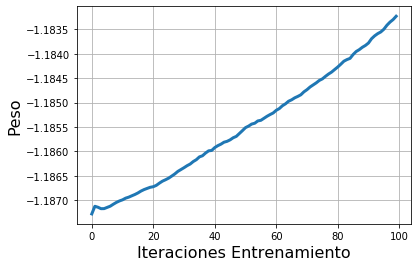

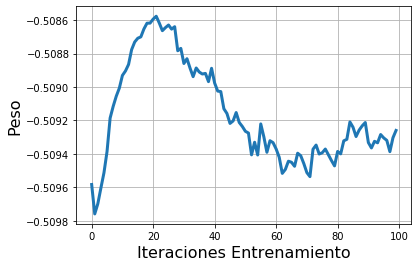

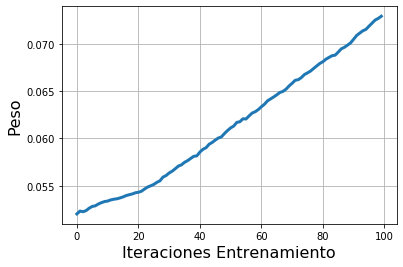

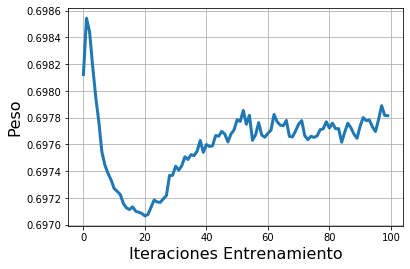

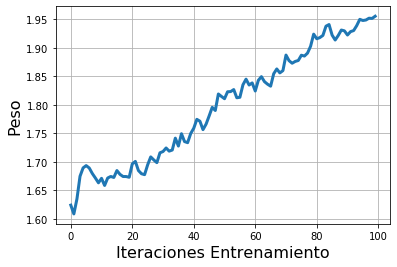

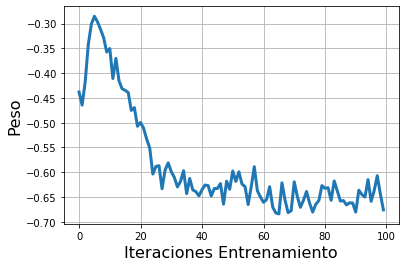

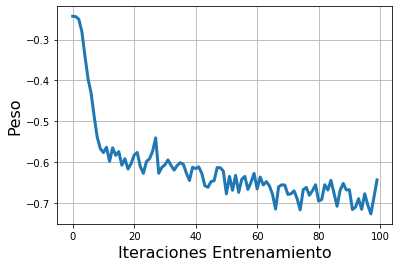

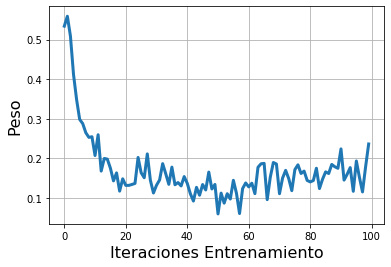

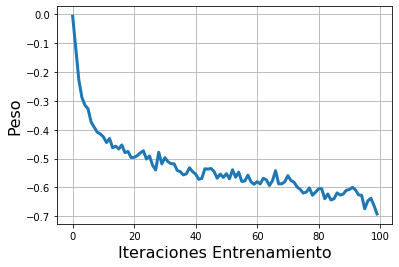

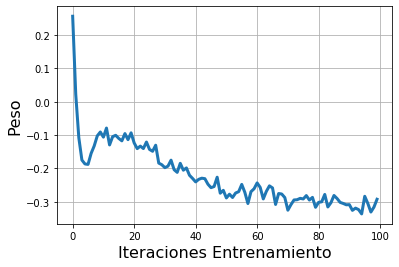

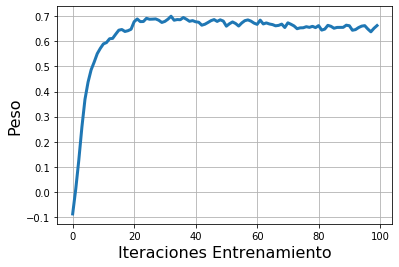

In [357]:
# for i in range(numero_de_conexiones):
#     plt.figure()
#     plt.plot(PesosEvol[:,i], lw = 3)
#     plt.grid(True)
#     plt.xlabel('Iteraciones Entrenamiento', size = 16)
#     plt.ylabel('Peso', size = 16)

In [13]:
#CON PREPROCESAMIENTO

def estandarizar(serie):
    ret = (serie - np.mean(serie))/np.std(serie)
    return ret

#para entrenamiento
porc = 0.7
train4 =indices['ANOM.2'].iloc[:int(porc*(len(indices['ANOM.2'])))]
train34 = indices['ANOM.3'].iloc[:int(porc*(len(indices['ANOM.3'])))]
train3 = indices['ANOM.1'].iloc[:int(porc*(len(indices['ANOM.1'])))]
train12 = indices['ANOM'].iloc[:int(porc*(len(indices['ANOM'])))]

NameError: name 'indices' is not defined

In [ ]:
#para test
porc2 = 1 - porc
test4 = indices['ANOM.2'].iloc[-int(porc2*(len(indices['ANOM.2']))):]
test34 = indices['ANOM.3'].iloc[-int(porc2*(len(indices['ANOM.3']))):]
test3 = indices['ANOM.1'].iloc[-int(porc2*(len(indices['ANOM.1']))):]
test12 = indices['ANOM'].iloc[-int(porc2*(len(indices['ANOM']))):]

In [ ]:
#Usar regiones 4, 3.4 y 3 para predecir niño 1.2

dsCalib=SupervisedDataSet(3,1) #tres entradas y una salida


dsCalib3=SupervisedDataSet(3,1) #tres entradas y una salida
dsCalib4=SupervisedDataSet(3,1) #tres entradas y una salida
dsCalib34=SupervisedDataSet(3,1) #tres entradas y una salida


for p1,p2,p3,res in zip(train4, train34, train3, train12):
    dsCalib.addSample((p1,p2,p3),(res,))
    dsCalib3.addSample((p1,p2,p3*0),(res,))
    dsCalib4.addSample((p1*0,p2,p3),(res,))
    dsCalib34.addSample((p1,p2*0,p3),(res,))

#Monta la red
entradas, nodos_por_capa1, salidas = 3,2,1
net = buildNetwork(entradas, nodos_por_capa1, salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida

#Entrena la red
net.reset()

trainer = BackpropTrainer(net, dsCalib)
numero_de_conexiones = entradas*nodos_por_capa1 + nodos_por_capa1*salidas

In [ ]:
net.modulesSorted

In [ ]:
for i in net.modules:
    print(i)
    if i.name != 'bias':
        for c in net.connections[i]:
            print(c)
            print(c.params)


In [ ]:
widest_layer = max([layer.dim for layer in net.modules])
widest_layer

In [ ]:
#     def draw(self):
#         widest_layer = max([layer.dim for layer in self.neural_network.modules])
#         network = NeuralNetwork(widest_layer)
#         for layer in self.neural_network.modulesSorted:
#             if type(layer) is BiasUnit:
#                 continue
#             network.add_layer(layer.dim)
#         network.draw()

In [ ]:
class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range(len(self.layers)):
            layer = self.layers[i]
            if i == len(self.layers) - 1:
                i = -1
            layer.draw(i)
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title('Neural Network architecture', fontsize=15)
        pyplot.show()